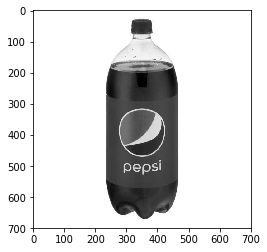

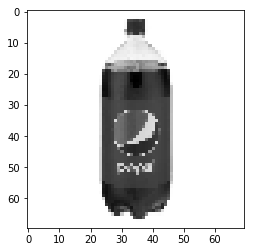

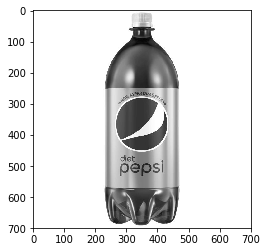

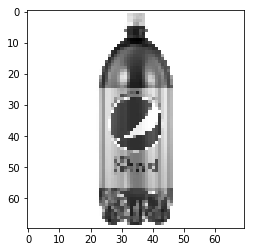

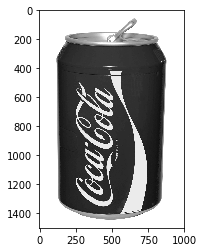

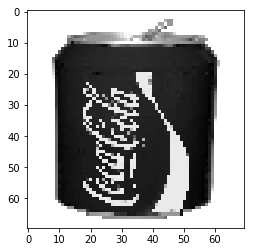

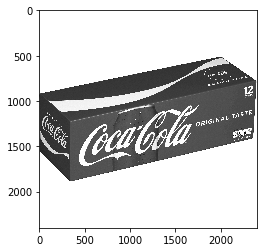

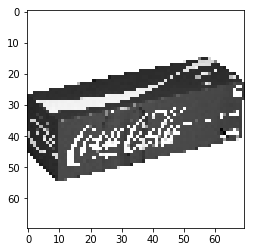

In [23]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2

DATADIR = "D:\Artificial Intelligence\Image Datasets"
CATEGORIES = ["Pepsi", "Coke"]
IMG_SIZE = 70

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to cats and dogs dir
    for img in os.listdir(path)[:2]:
        
        # initial image 
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        
        # resized image 
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), cv2.IMREAD_GRAYSCALE)
        plt.imshow(new_array, cmap="gray")
        plt.show()
        

In [27]:
training_data = [] #place for training data 

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to pepsi and coke dir
        class_num = CATEGORIES.index(category) # for labelling, pepsi as 0 and coke as 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

print(len(training_data))

187


In [28]:
# shuffling the datasets to avoid bias 

import random

random.shuffle(training_data)

1


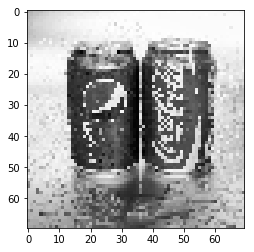

0


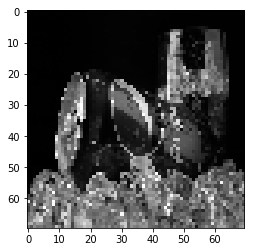

0


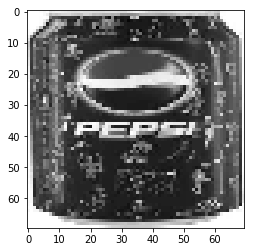

1


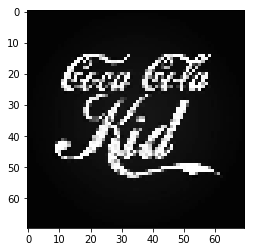

0


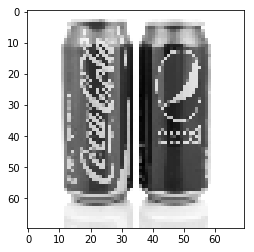

In [29]:
# proof that dataset is shuffled

for sample in training_data[:5]:
    print(sample[1])
    plt.imshow(sample[0], cmap="gray")
    plt.show()

In [30]:
X = [] # feature
y = [] # label

In [31]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 if grayscale , 3 if colored 


In [32]:
#saving the training data  

import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [34]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle 

# using our saved data 

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalize image data, divide each pixel value by 255 
X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:])) # first layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3))) # second layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # third layer 
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1)) # output layer
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

# train the models 5 times 
model.fit(X, y, batch_size=32, epochs=25, validation_split=0.1)

model.save("pepsicoke.model")

Train on 168 samples, validate on 19 samples
Epoch 1/25
168/168 [==============================] - 2s 9ms/step - loss: 0.7378 - acc: 0.5060 - val_loss: 0.6907 - val_acc: 0.5263
Epoch 2/25
168/168 [==============================] - 1s 3ms/step - loss: 0.6792 - acc: 0.7024 - val_loss: 0.7026 - val_acc: 0.3684
Epoch 3/25
168/168 [==============================] - 1s 3ms/step - loss: 0.6645 - acc: 0.6369 - val_loss: 0.6749 - val_acc: 0.7368
Epoch 4/25
168/168 [==============================] - 1s 3ms/step - loss: 0.6149 - acc: 0.7619 - val_loss: 0.6516 - val_acc: 0.7368
Epoch 5/25
168/168 [==============================] - 1s 3ms/step - loss: 0.5341 - acc: 0.8274 - val_loss: 0.5905 - val_acc: 0.6842
Epoch 6/25
168/168 [==============================] - 1s 3ms/step - loss: 0.4974 - acc: 0.7440 - val_loss: 0.8399 - val_acc: 0.4211
Epoch 7/25
168/168 [==============================] - 1s 3ms/step - loss: 0.4616 - acc: 0.7798 - val_loss: 0.6934 - val_acc: 0.6316
Epoch 8/25
168/168 [===========